### This notebook visualizes two randomly selected dimension of the kncokoffs generated with sRMMD using different $\varepsilon$. Description of the distributional setting  used here is given in Section 13.2 in the supplementary.

In [ ]:
import numpy as np
import pandas as pd
import gzip
import pickle
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from sklearn import linear_model

In [2]:
from matplotlib import rc
import matplotlib as mpl
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
mpl.rcParams['axes.linewidth'] = 1.2
w = 2.5

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:60% !important; }</style>"))

In [4]:
distType="GaussianMixtureAR1"
gz = gzip.open(distType+'_epsilon_check.pkl'+ '.gz', 'rb')
obj = pickle.loads(gz.read())
gz.close()
obj.keys()

dict_keys(['pars', 'xTrain', 'epsilon_100', 'epsilon_10', 'epsilon_20', 'epsilon_1', 'epsilon_50'])

In [6]:
xTrain= obj['xTrain']
epsilon_1 = obj['epsilon_1']
epsilon_10 = obj['epsilon_10']
epsilon_20 = obj['epsilon_20']
epsilon_50 = obj['epsilon_50']
epsilon_100 = obj['epsilon_100']

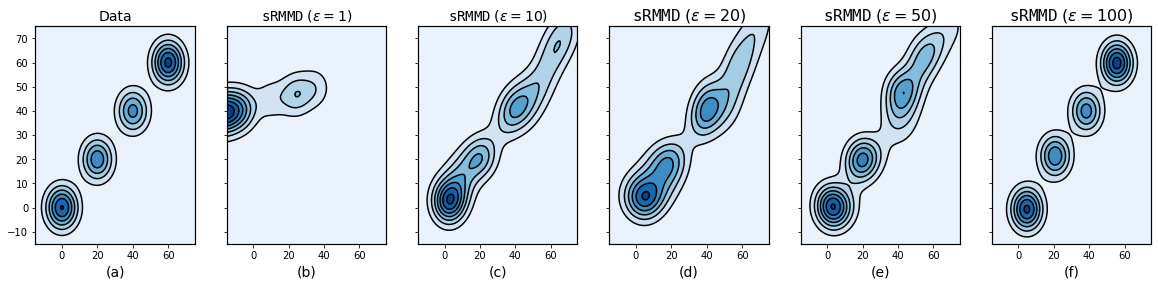

In [21]:
j1, j2 = np.random.permutation(100)[:2]
kde_data = KernelDensity(bandwidth=6)
kde_data.fit(xTrain[:, [j1, j2]])
kde_epsilon_1 = KernelDensity(bandwidth=6)
kde_epsilon_1.fit(epsilon_1[:, [j1, j2]])

kde_epsilon_10 = KernelDensity(bandwidth=6)
kde_epsilon_10.fit(epsilon_10[:, [j1, j2]])

kde_epsilon_20 = KernelDensity(bandwidth=6)
kde_epsilon_20.fit(epsilon_20[:, [j1, j2]])

kde_epsilon_50 = KernelDensity(bandwidth=6)
kde_epsilon_50.fit(epsilon_50[:, [j1, j2]])

kde_epsilon_100 = KernelDensity(bandwidth=6)
kde_epsilon_100.fit(epsilon_100[:, [j1, j2]])

xmin, xmax = -15, 75
ymin, ymax = -15, 75
A, B = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([A.ravel(), B.ravel()])
fig, axarr = plt.subplots(1, 6, figsize=(20, 4), sharex=True, sharey=True)

# # plot data
f = np.exp(np.reshape(kde_data.score_samples(positions.T), A.shape))
cfset = axarr[0].contourf(A, B, f, cmap='Blues')
cset = axarr[0].contour(A, B, f, colors='k')

# # # plot epsilon_1
f = np.exp(np.reshape(kde_epsilon_1.score_samples(positions.T), A.shape))
cfset = axarr[1].contourf(A, B, f, cmap='Blues')
cset = axarr[1].contour(A, B, f, colors='k')

# # plot epsilon_10
f = np.exp(np.reshape(kde_epsilon_10.score_samples(positions.T), A.shape))
cfset = axarr[2].contourf(A, B, f, cmap='Blues')
cset = axarr[2].contour(A, B, f, colors='k')

# # plot epsilon_20
f = np.exp(np.reshape(kde_epsilon_20.score_samples(positions.T), A.shape))
cfset = axarr[3].contourf(A, B, f, cmap='Blues')
cset = axarr[3].contour(A, B, f, colors='k')

# # plot epsilon_50
f = np.exp(np.reshape(kde_epsilon_50.score_samples(positions.T), A.shape))
cfset = axarr[4].contourf(A, B, f, cmap='Blues')
cset = axarr[4].contour(A, B, f, colors='k')

# # plot epsilon_100
f = np.exp(np.reshape(kde_epsilon_100.score_samples(positions.T), A.shape))
cfset = axarr[5].contourf(A, B, f, cmap='Blues')
cset = axarr[5].contour(A, B, f, colors='k')

axarr[0].set_title('Data', fontsize = 14)
axarr[1].set_title(r'$\mathtt{sRMMD}\;(\varepsilon = 1)$', fontsize = 14)
axarr[2].set_title(r'$\mathtt{sRMMD}\;(\varepsilon = 10)$', fontsize = 14)
axarr[3].set_title(r'$\mathtt{sRMMD}\;(\varepsilon = 20)$', fontsize = 16)
axarr[4].set_title(r'$\mathtt{sRMMD}\;(\varepsilon = 50)$', fontsize = 16)
axarr[5].set_title(r'$\mathtt{sRMMD}\;(\varepsilon = 100)$', fontsize = 16)

axarr[0].set_xlabel('(a)', fontsize = 14)
axarr[1].set_xlabel('(b)', fontsize = 14)
axarr[2].set_xlabel('(c)', fontsize = 14)
axarr[3].set_xlabel('(d)', fontsize = 14)
axarr[4].set_xlabel('(e)', fontsize = 14)
axarr[5].set_xlabel('(f)', fontsize = 14)
axarr[1].patch.set_alpha(0.)
plt.savefig('mode_vs_epsilon_sRMMD.pdf',bbox_inches='tight')
plt.show()


In [14]:
j1

20